In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install sweetviz
import sweetviz as sv

In [2]:
df=pd.read_excel('SocialStudiesReport -April 7-2016.xls',sheet_name='Sheet1',header=1)
df = df.drop(columns={'Maincurriculum One','Maincurriculum One.1','Other','Other Description'},axis=1)
pd.set_option('max_rows',60)

In [3]:
df.head()

School    curriculum SC planned? Civics  \
0     Little Flowers English School  Indian(CBSE)          No     No   
1                The Central School  Indian(CBSE)         Yes     No   
2  GEMS Our Own English High School  Indian(CBSE)         Yes     No   
3      Pakistan Educational Academy     PAKISTANI         Yes     No   
4            The Indian High School  Indian(CBSE)         Yes     No   

  Civics Description History History Description Geography  \
0                NaN      No                 NaN        No   
1                NaN      No                 NaN        No   
2                NaN      No                 NaN        No   
3                NaN      No                 NaN        No   
4                NaN      No                 NaN        No   

  Geography Description curriculum type  ...  \
0                   NaN  Not Applicable  ...   
1                   NaN       No Answer  ...   
2                   NaN       No Answer  ...   
3                   NaN       No Answer  ...   
4                   NaN       No Answer  ...   

                               SC in your daily life  \
0  Older Students mentioned environmental awarene...   
1  Learning skills are developed through opportun...   
2  Learning UAE social studies allows students to...   
3    • Very confident answering to this question?...   
4  Students adhered to the UAE code of conduct ,T...   

                                          Phase1Desc  \
0  In KG, although Social Studies is integrated w...   
1  Kindergarten children KG 1 & 2 have been intro...   
2  In the Kindergarten there was evidence of UAE ...   
3    • Social Studies was delivered in an integra...   
4                                                NaN   

                                          Phase2Desc  \
0  Younger students have a good knowledge of the ...   
1  Work samples - Grade 5 consists of basic recou...   
2  In the primary grades (1 through 4) students l...   
3    • Social Studies covers both prescribed curr...   
4                                                NaN   

                                          Phase3Desc  \
0  (Overlap between phases) In phase 3, similarly...   
1  Work samples - Grade 7 factual geographical ov...   
2  In the middle grades (5 through 8) the social ...   
3    • Grade 9 study the UAE Social Studies curri...   
4   \nPhase 3: ERF :138431,138458.  \n \nLesson o...   

                                          Phase4Desc  \
0                                     Not applicable   
1  Available on timetable as a weekly lesson but ...   
2  The secondary grades lessons were based upon t...   
3    • National Pakistan Curriculum only in Grade...   
4   \nPhase 4:    ERF: Lessons; 138431,138289\n \...   

                                      Summary Report  \
0  The school follows the Indian CBSE Social Stud...   
1  The school hasd developed a whole school UAE S...   
2  The school offered a formal programme of UAE s...   
3    • The Social Studies programme is based on t...   
4    • Students fully understood, appreciated and...   

  Pre Inspection Evaluation Submitted                 Created By  \
0                       NaN       YES    mnaguib@virginmedia.com   
1                       NaN       YES  alison.hedley61@gmail.com   
2                       NaN       YES            KHDA\john.brown   
3                       NaN       YES     ogormantony@eircom.net   
4                       NaN       YES       KHDA\bochra.kaddoura   

               Created On  
0 2015-10-22 15:50:45.643  
1 2015-10-22 08:59:26.993  
2 2015-10-22 11:51:30.563  
3 2015-10-22 17:24:44.880  
4 2015-10-22 20:28:01.417  

[5 rows x 29 columns]

In [4]:
# report = sv.analyze(df)
# report.show_html()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   School                     147 non-null    object        
 1   curriculum                 147 non-null    object        
 2   SC planned?                147 non-null    object        
 3   Civics                     147 non-null    object        
 4   Civics Description         49 non-null     object        
 5   History                    147 non-null    object        
 6   History Description        61 non-null     object        
 7   Geography                  147 non-null    object        
 8   Geography Description      61 non-null     object        
 9   curriculum type            147 non-null    object        
 10  curriculum integration     129 non-null    object        
 11  curriculum assessed?       147 non-null    object        
 12  Accounta

In [6]:
df.isna().sum()

School                        0
curriculum                    0
SC planned?                   0
Civics                        0
Civics Description           98
History                       0
History Description          86
Geography                     0
Geography Description        86
curriculum type               0
curriculum integration       18
curriculum assessed?          0
Accountable person for SC     0
Person qualifications        10
Assisting person              0
Why is SC important?          0
Further comments             72
SC vs other subjects          2
Further comments.1           67
SC in your daily life        19
Phase1Desc                   41
Phase2Desc                   24
Phase3Desc                   32
Phase4Desc                   67
Summary Report                2
Pre Inspection Evaluation    72
Submitted                     0
Created By                    0
Created On                    0
dtype: int64

# Re-arrange the data

In [7]:
df_compact = df.iloc[:,0:19].copy()
df_compact['curriculum type'] = df_compact['curriculum type'].replace({'Not Applicable':np.NaN,'No Answer':np.NaN,'Other':np.NaN})
df_compact['curriculum assessed?'] = df_compact['curriculum assessed?'].replace({'Not Applicable':np.NaN})
df_compact['curriculum type'] = df_compact['curriculum type'].replace({'Not Applicable':np.NaN,
                                'No Answer':np.NaN,'Other':np.NaN,'Other,':np.NaN,
                                'Interdisciplinary(Integrated),Theme-based':'A',
                                'Theme-based':'B',
                                'Interdisciplinary(Integrated)':'C',
                                'Multidisciplinary(Single subjects)':'D',
                                'Multidisciplinary(Single subjects),Interdisciplinary(Integrated)':'E',
                                'Multidisciplinary(Single subjects),Interdisciplinary(Integrated),Theme-based,Other':'F',
                                'Multidisciplinary(Single subjects),Theme-based':'G',
                                'Multidisciplinary(Single subjects),Interdisciplinary(Integrated),Theme-based':'H',
                                'Multidisciplinary(Single subjects),Other':'I'})
df_compact.drop(['Accountable person for SC','Person qualifications','Assisting person',
               'curriculum integration','Civics Description','History Description',
               'Geography Description','curriculum assessed?','Further comments',
                'Further comments.1','Why is SC important?'],axis=1,inplace=True)
df_compact['SC vs other subjects'] = df_compact['SC vs other subjects'].replace({'X':np.NaN})
df_compact['SC vs other subjects'] = df_compact['SC vs other subjects'].replace({'Not Applicable':np.NaN,'No Answer':np.NaN,'Other':np.NaN})
df_compact['SC vs other subjects'] = df_compact.rename(columns={'SC vs other subjects':'Cross studies'},inplace=True)
df_compact['SC planned?'] = df_compact.rename(columns={'SC planned?':'study planned?'},inplace=True)
df_compact.drop(['SC planned?','SC vs other subjects'],axis=1,inplace=True)
df_compact.fillna(inplace=True,value='N/A')


In [8]:
df_compact.iloc[20:30]

School     curriculum  \
20                            Gulf Indian High School   Indian(CBSE)   
21                           JSS International School  Indian(CISCE)   
22                            Ambassador School L.L.C  Indian(CISCE)   
23                      The Indian High School-Branch   Indian(CBSE)   
24                    The Indian International School   Indian(CBSE)   
25  H. H. Shaikh Rashid Al Maktoum Pakistani Schoo...      PAKISTANI   
26                          The Kindergarten Starters   Indian(CBSE)   
27                       GEMS Jumeirah Primary School             UK   
28                             GEMS Winchester School             UK   
29                               Dubai British School             UK   

   study planned? Civics History Geography curriculum type  \
20            Yes    Yes     Yes       Yes               D   
21            Yes     No      No        No             N/A   
22            Yes     No     Yes       Yes               C   
23            Yes     No      No        No               D   
24            Yes     No      No        No               C   
25            Yes    Yes     Yes       Yes               D   
26            Yes    Yes     Yes       Yes               A   
27            Yes     No      No        No               A   
28            Yes    Yes     Yes       Yes               C   
29            Yes    Yes     Yes       Yes               A   

                                   Cross studies  
20  Engaging,Relevant,Enriched,Thought provoking  
21  Engaging,Relevant,Enriched,Thought provoking  
22                                      Relevant  
23           Engaging,Relevant,Thought provoking  
24                             Engaging,Relevant  
25                       Engaging,Relevant,Other  
26                             Engaging,Relevant  
27                                           N/A  
28  Engaging,Relevant,Enriched,Thought provoking  
29                             Engaging,Relevant

# School types

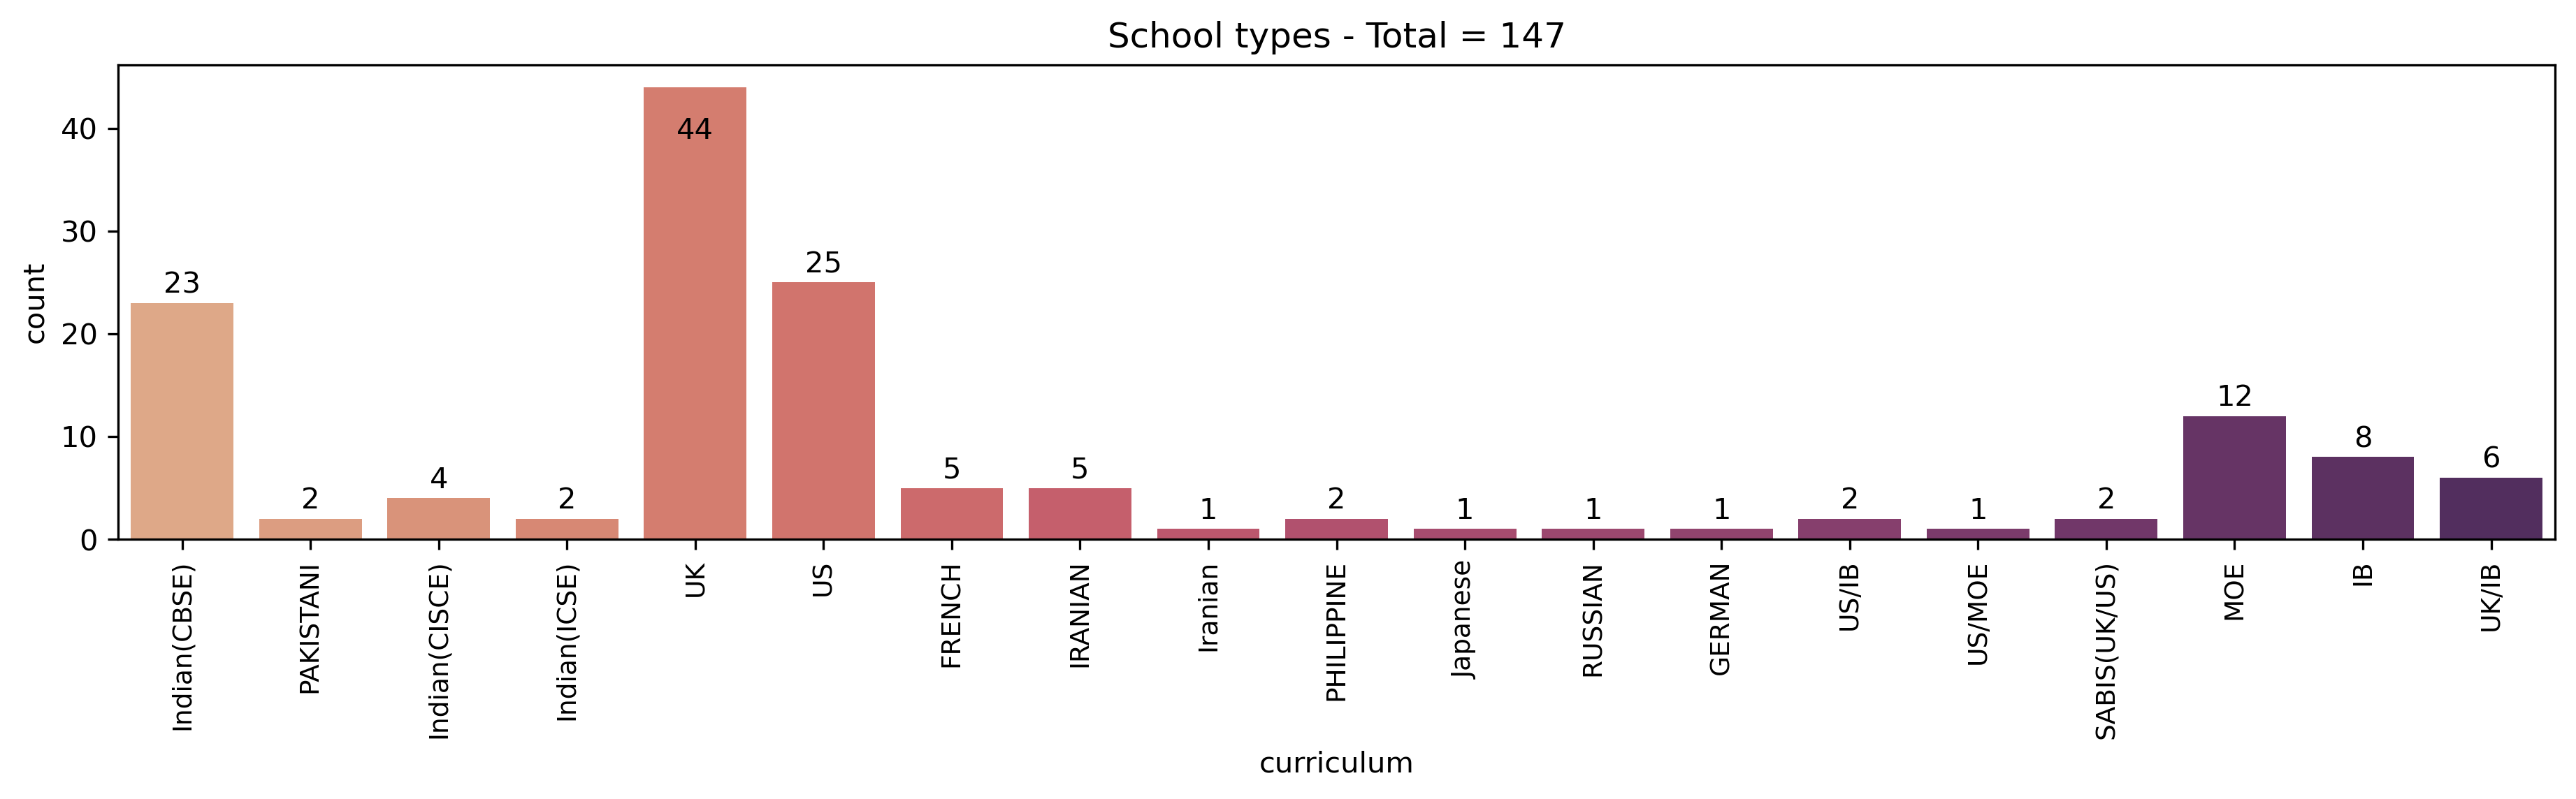

In [9]:
df_school_type = df.loc[:,['School','curriculum']].copy()

plt.figure(figsize=[15,3],dpi=300)
ax = sns.countplot(x=df_school_type['curriculum'],palette='flare')
ax.set_title('School types - Total = {}'.format(df_school_type['curriculum'].count()))
plt.xticks(rotation='90',fontsize=9)

max_height=0
for x in ax.patches:
    h = x.get_height()
    max_height = h if h > max_height else max_height

for x in ax.patches:
    if x.get_height() < max_height:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()+1),ha='center',fontsize=10)
    else:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()-5),ha='center',fontsize=10)
        
plt.show();

# Are the study concepts implemented?

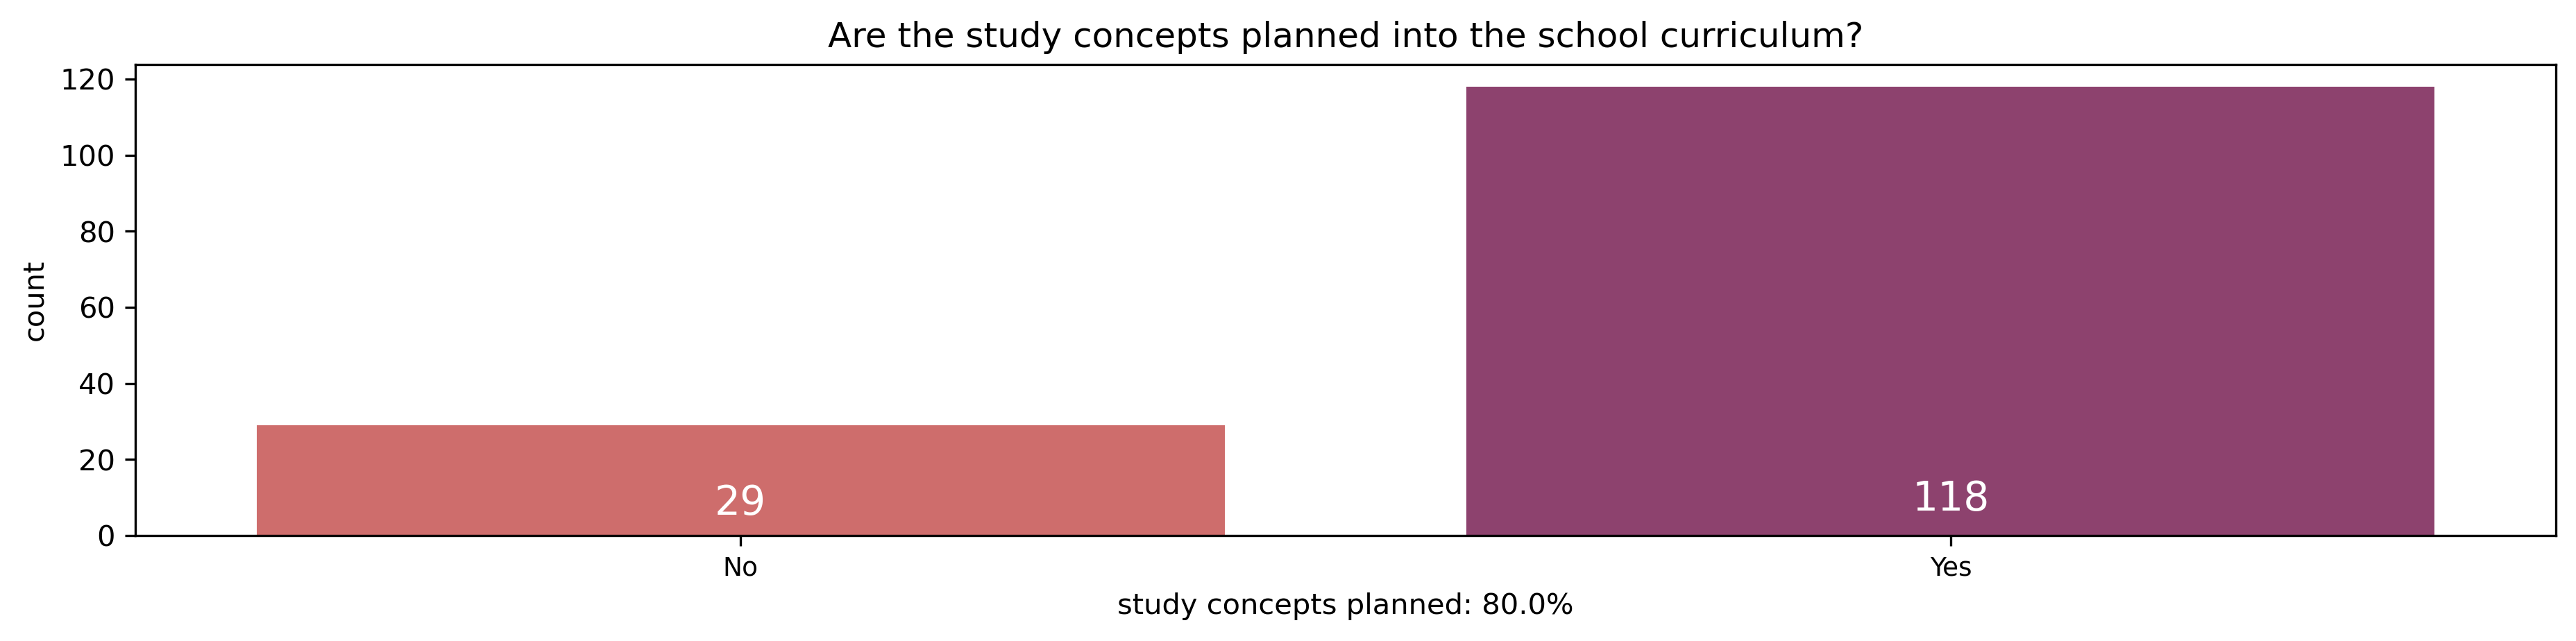

In [10]:
fig,ax = plt.subplots(figsize=(15,3),dpi=300)
ax = sns.countplot(x=df_compact['study planned?'],palette='flare')
ax.set_title('Are the study concepts planned into the school curriculum?')
perc = round((df_compact['study planned?'] == 'Yes').sum() / df_compact['study planned?'].value_counts().sum(),2)*100
ax.set_xlabel('study concepts planned: {}%'.format(perc))
plt.xticks(fontsize=9)
for x in ax.patches:
    ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_x()+6),size=14,color='white',ha='center')

# What subjects are incorporated in the study concepts?

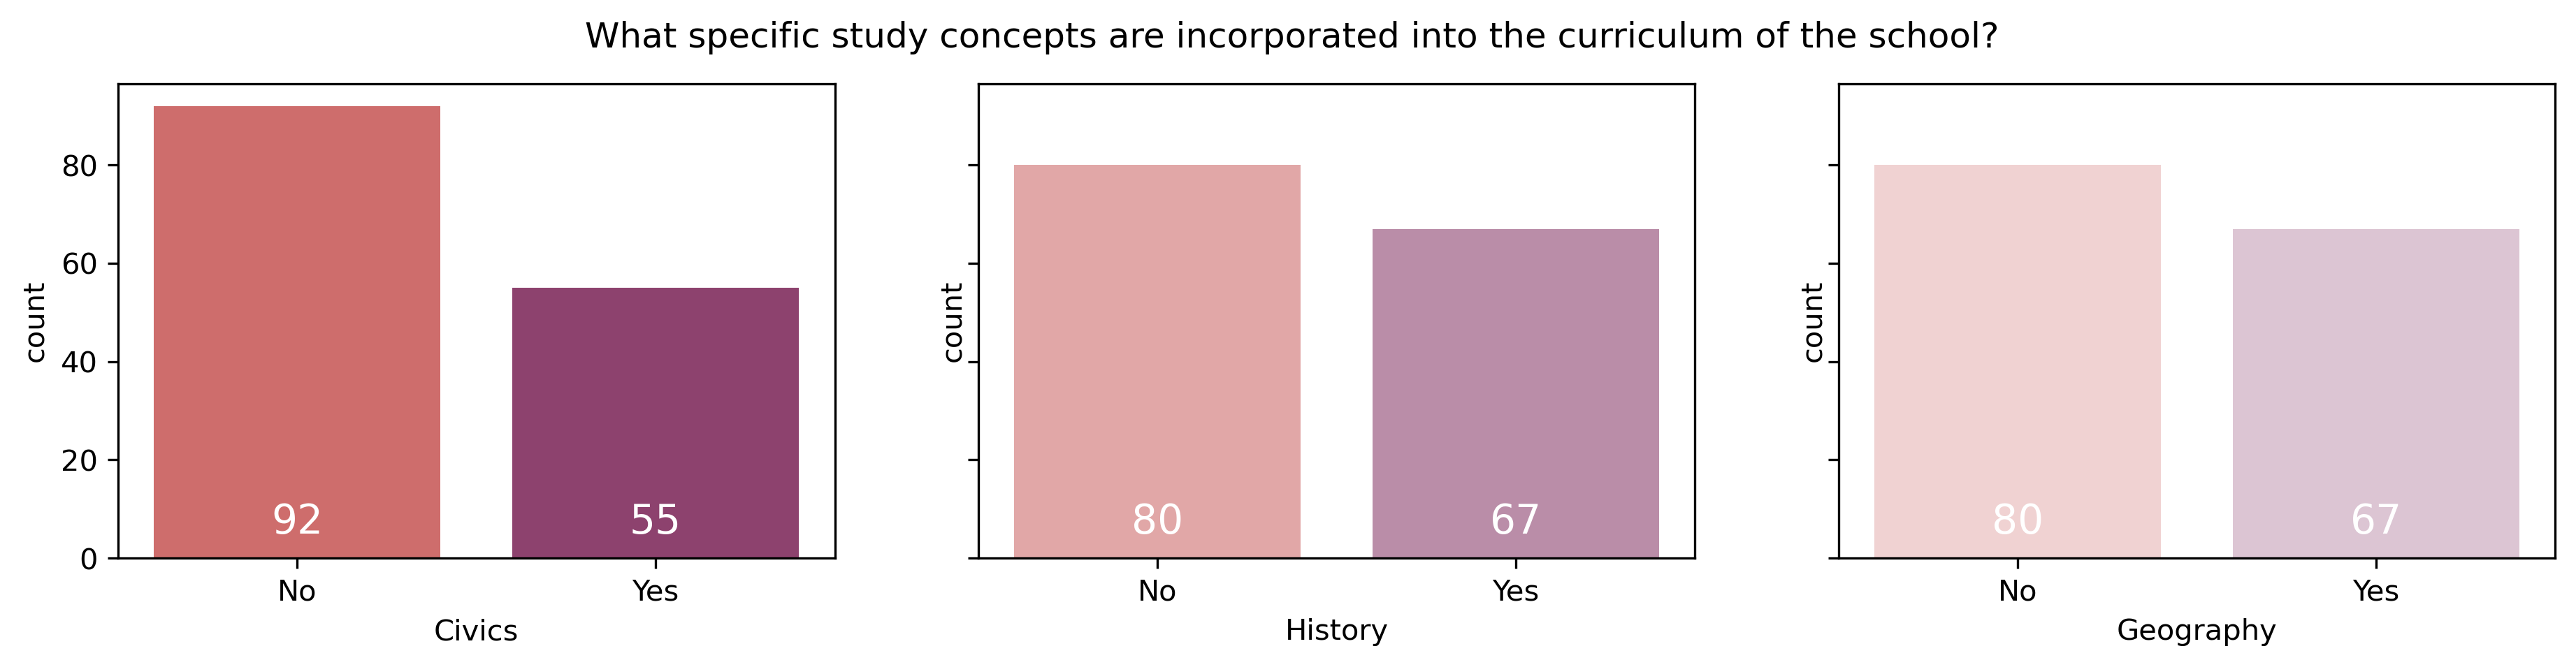

In [11]:
fig,ax = plt.subplots(1,3,sharey=True,figsize=(15,3),dpi=300)
ax_one = sns.countplot(ax=ax[0],x=df_compact['Civics'],palette='flare',alpha=1)
ax_two = sns.countplot(ax=ax[1],x=df_compact['History'],palette='flare',alpha=0.6)
ax_three = sns.countplot(ax=ax[2],x=df_compact['Geography'],palette='flare',alpha=0.3)
fig.suptitle('What specific study concepts are incorporated into the curriculum of the school? ')

for x in ax_one.patches:
    ax_one.annotate(x.get_height(),(x.get_x()+0.4,x.get_y()+5),size=14,color='White',ha='center')
for x in ax_two.patches:
    ax_two.annotate(x.get_height(),(x.get_x()+0.4,x.get_y()+5),size=14,color='White',ha='center')
for x in ax_three.patches:
    ax_three.annotate(x.get_height(),(x.get_x()+0.4,x.get_y()+5),size=14,color='White',ha='center')   
    

# What is the approach used in the study concepts?

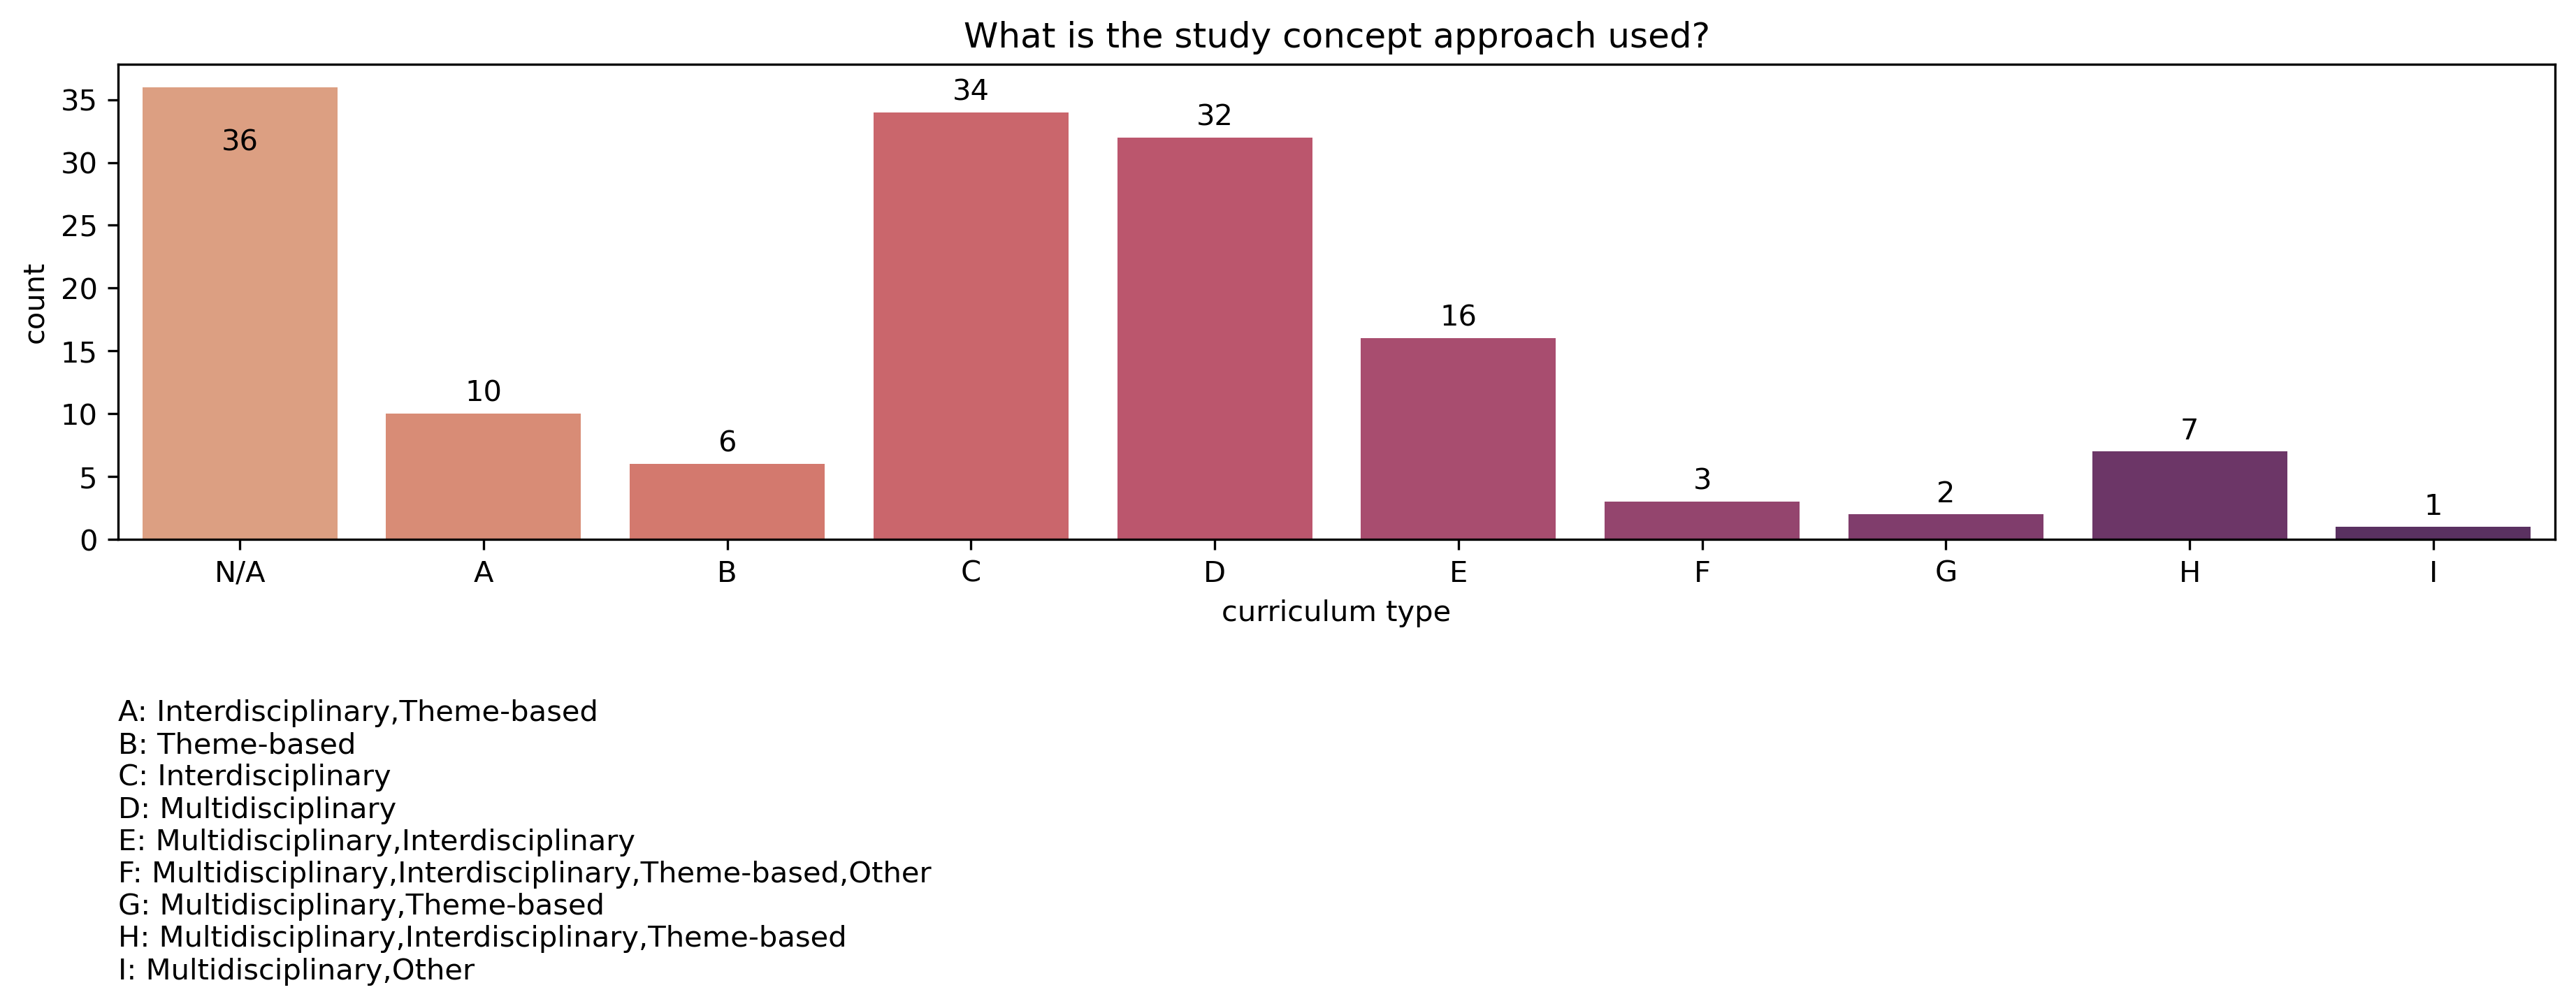

In [12]:
fig,ax = plt.subplots(figsize=(15,3),dpi=300)
ax=sns.countplot(x=df_compact['curriculum type'],palette='flare')

max_height=0
for x in ax.patches:
    h = x.get_height()
    max_height = h if h > max_height else max_height

for x in ax.patches:
    if x.get_height() < max_height:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()+1),ha='center',fontsize=10)
    else:
        ax.annotate(x.get_height(),(x.get_x()+0.4,x.get_height()-5),ha='center',fontsize=10)
    
ax.set_title('What is the study concept approach used?')
my_text = 'A: Interdisciplinary,Theme-based\nB: Theme-based\nC: Interdisciplinary\nD: Multidisciplinary\nE: Multidisciplinary,Interdisciplinary\nF: Multidisciplinary,Interdisciplinary,Theme-based,Other\nG: Multidisciplinary,Theme-based\nH: Multidisciplinary,Interdisciplinary,Theme-based\nI: Multidisciplinary,Other'
plt.text(-0.5,-35,my_text,ha='left',fontsize=10)
plt.show()

# Module for comparing 2 variables

In [13]:
def compare_two(X,Y,w,h):
    fig,ax = plt.subplots(figsize=(w,h),dpi=600)
    ax = sns.scatterplot(x=X,y=Y,color='blue')
    plt.xticks(rotation=90,fontsize=12)
    plt.yticks(fontsize=6)
    plt.grid()

In [14]:
# compare curriculum with schools

compare_two(df_compact['curriculum'],df_compact['School'],20,40)
plt.savefig('curriculumVSschool.pdf')